<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/EjercicioKNNAbulon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Drive**

In [369]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True) #  force_remount=True , pide eso no sé porqué

Mounted at /content/drive


# **Importación de Librerías**

## **Librerias Panda y Visualización**

In [370]:
import pandas as pd
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

import missingno as msno
import numpy as np

sns.set_theme()


## **Librerias Machine Learning**

In [371]:
# LIBRERIAS MACHINE LEARNING

from sklearn                 import metrics                # Metricas (Matriz de Confunsión)

from sklearn.linear_model    import LogisticRegression     # Regresión Logistica
from sklearn.linear_model    import LinearRegression       # Regresión Lineal

from sklearn.preprocessing   import StandardScaler         # Standarización

from sklearn.neighbors       import KNeighborsClassifier   # Knn como clasificador
from sklearn.neighbors       import KNeighborsRegressor    # Knn como Regresor

from sklearn.tree            import DecisionTreeClassifier # Arboles de Decisión Clasificador
from sklearn.tree            import DecisionTreeRegressor  # Arboles de Decisión Regresor

from sklearn.ensemble        import BaggingClassifier      # Bagging and pasting
from sklearn.ensemble        import RandomForestClassifier # Bosques aleatorios (Random Forests)
from sklearn.model_selection import GridSearchCV           # Grid Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV     # Para Pruebas Random

from sklearn.model_selection import train_test_split       # Para dividir las pruebas

from sklearn                 import tree                   # Grficar Arboles

# PARA OBTENER METRICAS
from sklearn.metrics         import mean_absolute_error    # Error absoluto medio (MAE)
from sklearn.metrics         import mean_squared_error     # Error cuadrático medio (MSE) y Raíz del error cuadrático medio (RMSE)
from sklearn.metrics         import r2_score               # Determinar el r2 score

# **Carga de Datos**

In [372]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df




In [373]:
filename = 'abalone.csv'    

df = CargaDatos(filename)

# **Información de los Datos**


In [374]:
df.head() 

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# **Verificar Datos Nulos isna**

In [376]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [377]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# **Verificar Datos Nulos (Null)**

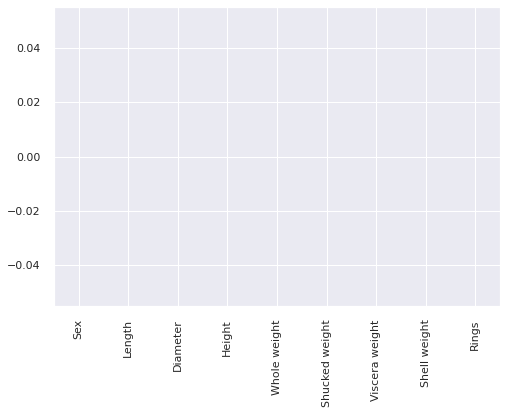

In [378]:
df.isnull().sum().plot.bar();

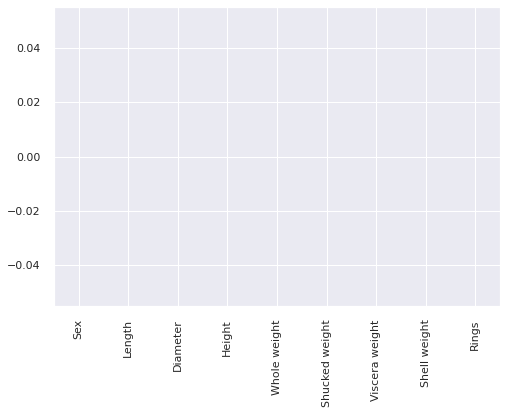

In [379]:
df.isnull().sum().plot.bar();

# **Verificar Datos Duplicados**

In [380]:
df.duplicated().sum()

0

# **Gráfica de Campos.** 

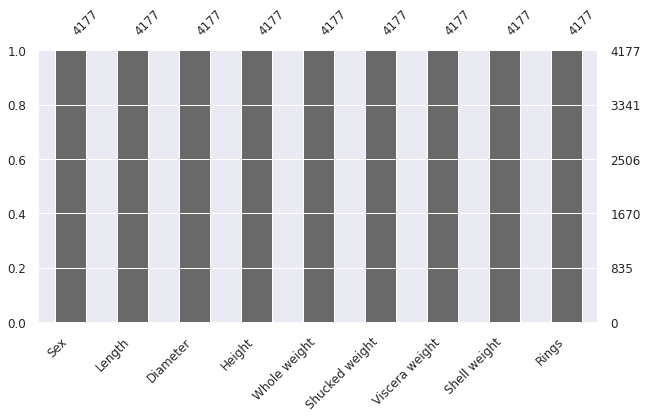

In [381]:
msno.bar(df, figsize=(10,5), fontsize=12);

In [382]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [383]:
df.shape

(4177, 9)

## **Preparación,Análisis y Limpieza de Datos**

In [384]:
#Muestra Datos Tipo Numericos para una columna
def ShowNumber( vpdf , vfield, Numbers = True , retornaFiltro = False):
  
  filtro = vpdf[vfield].str.isnumeric() 

  if retornaFiltro == False:
    return vpdf[filtro == Numbers]
  else:
   return  filtro 

In [385]:
#Muestra Datos NaN para una columna
def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):

  data_None = vpdf[vpfield].isna() 

  if retornaFiltro == False:
    return vpdf[data_None]
  else:
   return  data_None 

In [386]:
#Cambia Tipo Dato de Un campo
def CambiaTipoDatoDF(vpdf ,vpfield, vptype):
  vpdf[vpfield] = vpdf[vpfield].astype(vptype) 
  return vpdf


In [387]:
def EliminaColumnas(vpdf , vpcolumns):
  
  vpdf.drop(columns = vpcolumns , inplace = True)

  return vpdf


In [388]:
#Elimina Filas Según Index
def EliminaFilasIndex(vpdf , indexNames):

  return vpdf.drop(indexNames)

In [389]:
#Elimina Filas Según Filtro
def EliminaFilasCondicion(vpdf , Filtro):

  return vpdf[Filtro]

In [390]:
def ShowDataFieldsNaN(data):
  filtro_NaN = data['NaN'] >0 
  return data[filtro_NaN]


In [391]:
def ShowDataFieldsNoNumber(data):
  filtro_Numbers_NoNumbers = ( data['Numbers'] >0 ) &  ( data['NoNumbers'] >0  )
  return data[filtro_Numbers_NoNumbers]

In [392]:
def ModificaDatosNaNValor(vpdf,vpfield, vpValor):

  vpdf[vpfield].fillna(vpValor)


In [393]:
def Analisifield(df,column):
 
  data = pd.DataFrame([{ 'Field':'','Numbers':0, 'NoNumbers':0 ,'NaN':0, 'NaN%':0,'TotalRows':0 ,'dtypes':'','Length':0 }])
  
  data['Field']      = column
 
  try:
    df[column].count()
  except:
    return data  

  data['dtypes'] = df[column].dtypes
  try:

    if df[column].dtypes == object:

      filtro = df[column].str.isnumeric()
      
      data['Numbers']    = df[filtro==True][column].count()
      data['NoNumbers'] = df[filtro==False][column].count()
      data['Length'] = df[column].str.len()
    else:
      data['Numbers']    = df[column].count()

  except:
    
    data['NoNumbers'] = df[column].count()

  try:
    data['NaN']  =  df[column].isna().sum()
    data['NaN%'] =  df[column].isna().sum()/df.shape[0]*100
  except:
    data['NaN'] = 0

  data['TotalRows'] = data['Numbers'] + data['NoNumbers'] + data['NaN'] 
  
  return data

In [394]:
def AnalizaDataFrame(df_):

  data = pd.DataFrame(columns=['Field','Numbers','NoNumbers','NaN','NaN%','dtypes'])

  for column in df_.columns:
    data =pd.concat([data,Analisifield(df,column)]) 
  data.reset_index(inplace =True,drop=True)
  return data


In [395]:
data = AnalizaDataFrame(df)
data

Field Numbers NoNumbers NaN  NaN%   dtypes  TotalRows  Length
0             Sex       0      4177   0   0.0   object     4177.0     1.0
1          Length    4177         0   0   0.0  float64     4177.0     0.0
2        Diameter    4177         0   0   0.0  float64     4177.0     0.0
3          Height    4177         0   0   0.0  float64     4177.0     0.0
4    Whole weight    4177         0   0   0.0  float64     4177.0     0.0
5  Shucked weight    4177         0   0   0.0  float64     4177.0     0.0
6  Viscera weight    4177         0   0   0.0  float64     4177.0     0.0
7    Shell weight    4177         0   0   0.0  float64     4177.0     0.0
8           Rings    4177         0   0   0.0    int64     4177.0     0.0

In [396]:
ShowDataFieldsNoNumber(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [397]:
ShowDataFieldsNaN(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

# **Proceso depuración Datos**


## **Datos no number**

In [398]:
cont = 0
contador_datos = 0

for index in data.index:
  if data['Numbers'][index] >0 and data['NoNumbers'][index] >0:
    contador_datos += 1
    df_NoNumber =  ShowNumber(df ,data['Field'][index], False ) 
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    print(f" field = '{data['Field'][index]}' ")
    
    if cont == 0:
      df_NoNumber = ( ShowNumber(df ,data['Field'][index], False ) )
    else:
      df_NoNumber = pd.merge( df_NoNumber , (ShowNumber(df ,data['Field'][index], False ))  )
    
    cont += 1

if contador_datos>0:
  df_NoNumber

### **Variables para Procesos de datos**

In [399]:

bEliminaColumnaNaN = False
bEliminaFilasNaN   = False

bCambiaTipoDato    = False
bActualizaColumna  = False



# **Actualiza una fila especifica**

In [400]:
if bActualizaColumna == True:
  
  filtro = ShowNumber(df ,'<Campo a Actualizar>', False, True )
  df.loc[ filtro == False  , ['<Campo a Actualizar>']] = 27 #Valor a reemplazar Numerico ó No
  df[filtro == False]


# **Eliminar una o varias Columnas**

In [401]:
if bEliminaColumnaNaN == True:
  columns = [''] # Colocar las columnas a eliminar
  for column in columns:
    print(f"column = {column}")
    EliminaColumnas(df,column) 


# **Cambiando TipoDato de Columna**

In [402]:
if bCambiaTipoDato == True:
  df = CambiaTipoDatoDF(df , '<campo>' , 'int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# **Campos NaN**

In [403]:
#Filtro por los errores en los datos
ShowDataFieldsNaN(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [404]:
#def ShowNaNdf( vpdf, vpfield, retornaFiltro = False):
cont = 0
contador_datos = 0

for index in data.index:
  
  if data['NaN'][index] >0:
    
    #print(f"index = {index} data['Field'][index] = {data['Field'][index]} data['NoNumbers'][index] = {data['NoNumbers'][index]} ")
    
    #print(f" field = '{data['Field'][index]}' ")
    if cont == 0:
      
      #print(f"Ciclo ={cont} field = '{data['Field'][index]}' ")
      df_NaNdf = ( ShowNaNdf(df ,data['Field'][index] ) )
      #print(df_NaNdf)
    else:
      #print(f"Ciclo ={cont}  merge field = '{data['Field'][index]}' ")
      df_NaNdf_aux = ShowNaNdf(df ,data['Field'][index])
      #print(df_NaNdf_aux)
      df_NaNdf = pd.merge( df_NaNdf , df_NaNdf_aux , how='outer')  
    
    cont += 1

if contador_datos > 0 :
  df_NaNdf

# **Eliminando Filas NaN**

In [405]:
if bEliminaFilasNaN == True:
  columns = [] # Colocar nombre de los campos  a eliminar filas entre comillas y separado por coma ['Campo1','Campo2']
  for column in columns:
    print(f"row = {column}")
    filtro_NaN = ShowNaNdf(df ,column, True)
    df = df[~filtro_NaN]

df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

# **Elimina Columnas Multiples**

In [406]:
if bEliminaColumnaNaN == True:
  columns = [] # Colocar las columnas a eliminar entre comillas ''
  for column in columns:
    print(f"column = {column}")
    EliminaColumnas(df,column) 

df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

# **Manejo de Datos Duplicados**

In [407]:
data_duplicated = df.duplicated()
df[data_duplicated]

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []

# **Elimina Duplicados**

In [408]:
df.drop_duplicates(inplace=True)
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [409]:
data = AnalizaDataFrame(df)
data

Field Numbers NoNumbers NaN  NaN%   dtypes  TotalRows  Length
0             Sex       0      4177   0   0.0   object     4177.0     1.0
1          Length    4177         0   0   0.0  float64     4177.0     0.0
2        Diameter    4177         0   0   0.0  float64     4177.0     0.0
3          Height    4177         0   0   0.0  float64     4177.0     0.0
4    Whole weight    4177         0   0   0.0  float64     4177.0     0.0
5  Shucked weight    4177         0   0   0.0  float64     4177.0     0.0
6  Viscera weight    4177         0   0   0.0  float64     4177.0     0.0
7    Shell weight    4177         0   0   0.0  float64     4177.0     0.0
8           Rings    4177         0   0   0.0    int64     4177.0     0.0

In [410]:
ShowDataFieldsNoNumber(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [411]:
ShowDataFieldsNaN(data)

Empty DataFrame
Columns: [Field, Numbers, NoNumbers, NaN, NaN%, dtypes, TotalRows, Length]
Index: []

In [412]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# **Graficar Matriz de Correlación**

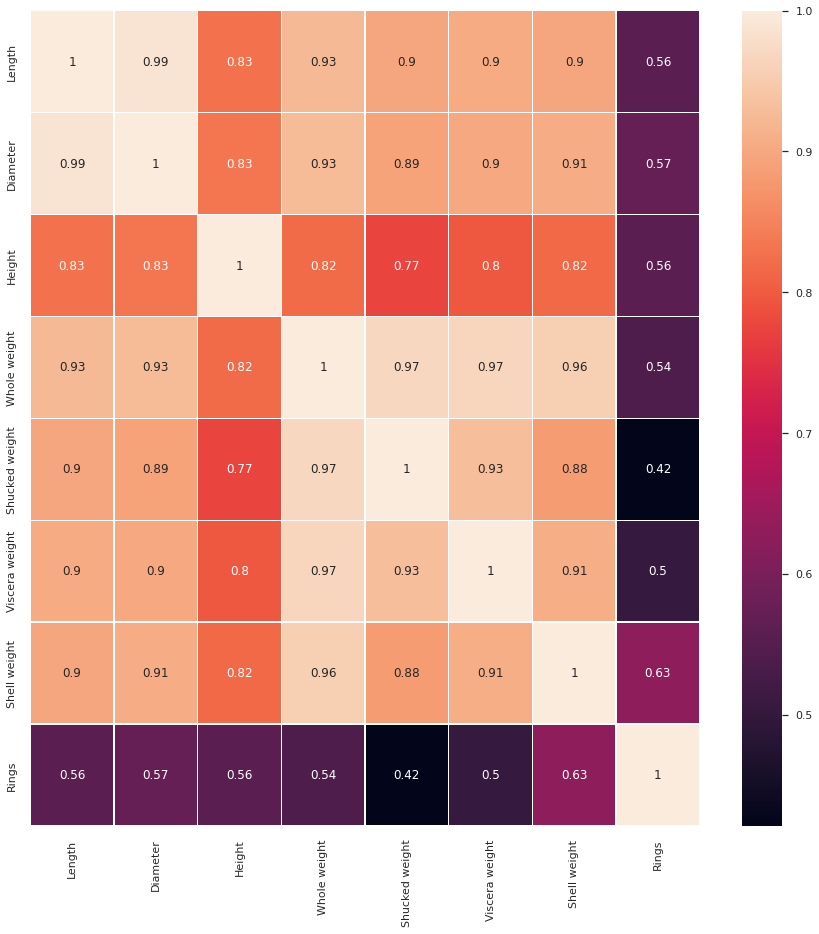

In [413]:
f, ax = plt.subplots(figsize=(15, 15))

correlation_mat = df.corr()
 
sns.heatmap(correlation_mat, annot = True , linewidths=.5, ax=ax );

In [414]:
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 455.4+ KB


In [416]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

# **Filtrado de Datos**

In [417]:
# Filtrado de DataFrame

#Condiciones
#filtro_datos_1 = df['Campo1'] == '<CONDICICION>'
#filtro_datos_2 = df['Campo1'] == '<CONDICICION>'

#Filtro final con las condiciones
#filtro_final = ( filtro_datos_1 & filtro_datos_1 )

#df_valores = df[filtro_final] 

df_valores = df
df_valores

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [418]:
df_valores['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

**Cambiar los campos tipo fecha a Numeros , los modelos siempre tabrajan mejor con números**

In [419]:
df_valores['Sex'] = df_valores.Sex.map({'M': 0,'F': 1, 'I':2})
df_valores

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [420]:
#df_valores['Sex'] = df_valores['Sex'].map({'M': 0,'F': 1, 'I':2})
#df_valores

In [421]:
df_valores['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

# **Gráfico inicial**


In [422]:
# **Gráfico inicial**
#
GraficarHistogramaPloty(df, 'Sex', nbins = 5 );

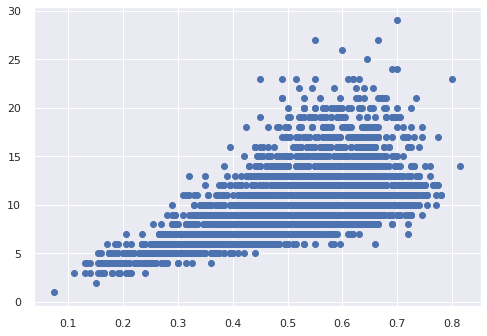

In [423]:
plt.scatter(df_valores['Length'], df_valores['Rings'], s = None, c = None, marker = None, cmap = None, vmin = None, vmax = None, alpha = None, linewidths = None, edgecolors = None)

In [424]:
#Sex	Length	Diameter	Height	Whole weight	Shucked weight	Viscera weight	Shell weight	Rings

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (8,8), dpi=1000)
sns.regplot(x='Length', y='Rings', data=df, ci=None, ax = axes[0,0], scatter_kws={'alpha':0.3});
sns.regplot(x='Diameter', y='Rings', data=df, ci=None, ax = axes[0,1], scatter_kws={'alpha':0.3});
sns.regplot(x='Height', y='Rings', data=df, ci=None, ax = axes[0,2], scatter_kws={'alpha':0.3});
sns.regplot(x='Whole weight', y='Rings', data=df, ci=None, ax = axes[1,0], scatter_kws={'alpha':0.3});
sns.regplot(x='Shucked weight', y='Rings', data=df, ci=None, ax = axes[1,1], scatter_kws={'alpha':0.3});
sns.regplot(x='Viscera weight', y='Rings', data=df, ci=None, ax = axes[1,2], scatter_kws={'alpha':0.3});
sns.regplot(x='Shell weight', y='Rings', data=df, ci=None, ax = axes[2,0], scatter_kws={'alpha':0.3});
fig.tight_layout();

# **Obtención de Datos X e y**

In [425]:
# Sex Length	Diameter	Height	'Whole weight'	'Shucked weight'	'Viscera weight' 'Shell weight' Rings
# values los deja como arreglo , pero se pueden usar los dataframe Directos

# Forma 1 cuando son pocas columnas para el loc
#X = df_valores.loc[:, ['campo1','campo2','campo3','campo4']]    #.values

# Forma 2 cuando debo eliminar pocas columnas y deben quedar muchas columnas en el data frame
X = df_valores.drop(columns=['Rings']) #.values 

# Forma 3 Parecido a parte 1 , en el loc se podría usar un filtro. Ojo
#X = df_valores[['campo1','campo2','campo3','campo4']]  #.values

X

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550  
4             0.0395        0.0550  
...              ...           ...  
4172          0.2390        0.2490  
4173          0.2145        0.2605  
4174          0.2875        0.3080  
4175          0.2610        0.2960  
4176          0.3765        0.4950  

[4177 rows x 8 columns]

In [426]:
X.shape

(4177, 8)

In [427]:
y = df_valores.loc[:, 'Rings']

In [428]:
y.shape

(4177,)

# **Regresión Lineal**

In [429]:
def MetodoLinearRegression(X,y):
  
  X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3) # Divide los datos para pruebas

  #############################
  #   INICIO REGRESION        #
  #############################

  #Crea una instancia de regresión lineal
  
  reg = LinearRegression() # ( fit_intercept=True ) = Aplica solo para datos que tienen un comportamiento más líneal.

  # Entrenando el Modeo para Clasificación
  reg.fit(X_train, y_train)  

  #Realizando la Regresión
  y_pred    = reg.predict(X_test) 

  #############################
  #         METRICAS          #
  #############################

  score     = reg.score(X_train, y_train)
  coef      = reg.coef_
  intercept = reg.intercept_
  r2 = r2_score(y_test, y_pred)

  mae  = mean_absolute_error(y_test, y_pred)
  mse  = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2   = r2_score(y_test, y_pred)

  print(f" score                = {score} ")
  print(f" reg.coef_            = {coef} ")
  print(f" intercept            = {intercept}  ")
  print(f" mae  {mae}                       ")
  print(f" mse  {mse}                       ")
  print(f" rmse {rmse}                      ")
  print(f" r2   {r2}                        ")

  #Realizando la Regresión con X
  y_predX    = reg.predict(X) 
  
  matrizconf = metrics.confusion_matrix(y_test.values, y_pred)

  return y_pred , y_predX, matrizconf

# **Regresión Logística**

In [430]:
def MetodoLinearRegression(X,y):

  #X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3) # Divide los datos para pruebas
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
  
  # Estandarizar datos
  scaler = StandardScaler()

  # Ajusta solo en el conjunto de entrenamiento
  scaler.fit(X_train)

  # Aplicar transformación tanto al conjunto de entrenamiento como al conjunto de prueba

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  #############################
  #   INICIO REGRESION        #
  #############################

  #Crea una instancia de regresión lineal

  # Crea una instancia de un modelo
  logreg = LogisticRegression()
  
  # Entrena el modelo con los datos
  logreg.fit(X_train, y_train);

  # predicciones de clase (no probabilidades predichas)
  y_pred = logreg.predict(X_test)


  score = logreg.score(X_test, y_test)
  coef      = logreg.coef_
  intercept = logreg.intercept_

  mae  = mean_absolute_error(y_test, y_pred)
  mse  = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2   = r2_score(y_test, y_pred)


  print(f" score                = {score} ")
  print(f" reg.coef_            = {coef} ")
  print(f" intercept            = {intercept}  ")
  print(f" mae  {mae}                       ")
  print(f" mse  {mse}                       ")
  print(f" rmse {rmse}                      ")
  print(f" r2   {r2}                        ")

  matrizconf = metrics.confusion_matrix(y_test.values, y_pred)

  return y_pred  , matrizconf


# **KNN**

## **Estandarizar datos**

In [431]:
def MetodoEstandarizarDatos(X):
  
  #############################
  #   INICIO STANDARIZACION   #
  #############################

  scaler = StandardScaler()
  
  # Ajusta en X (asumiendo que tu matriz de características es una matriz NumPy)
  scaler.fit(X)
  
  # Transform X
  X = scaler.transform(X);
  
  return X

**KNN como Clasficador**

In [500]:
def MetodoKNNClasificador(X , y , n_neighbors):


  #############################
  #  INICIO DE STANDARIZACION #
  #############################

  scaler = StandardScaler()

  # Ajustar solo el conjunto de entrenamiento
  scaler.fit(X)
  
  # Aaplicar transform tanto al conjunto de entrenamiento como al conjunto de prueba
  X = scaler.transform(X)


  #############################
  #      SPLIT DE DATOS       #
  #############################

  X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 42) # Entrenamiento del Modelo

  #############################
  #  INICIO DE CLASIFICACION  #
  #############################

  knn = KNeighborsClassifier(n_neighbors=n_neighbors) #parámetro n_neighbors 

  knn.fit(X_train,y_train) #Entrenando el Modeo  Knn siempre entreno Sobre X , y 

  y_pred = knn.predict(X_test) #Realizando la predicción

  # calcular la precisión de la clasificación
  score = knn.score(X, y)

  #############################
  #         METRICAS          #
  #############################

  print(f"n_neighbors = {n_neighbors} ")
  print(f"y_pred      = {y_pred} ")
  print(f"y_test      = {y_test} ")
  print(f"score       = {score}  \n")

  y_predX = knn.predict(X)

  return y_pred , y_predX , X_test , y_test  , score

**KNN como Regresión**

In [433]:
def MetodoKNNRegresion(X , y , n_neighbors=2):

  X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=42) # Divide los datos para pruebas
  
  #############################
  #     INICIO REGRESION      #
  #############################

  # Define Clase Regresora
  reg = KNeighborsRegressor(n_neighbors = n_neighbors,algorithm='auto')

  reg.fit(X_train, y_train) # Entrenando el Modeo
  
  y_pred = reg.predict(X_test)

  #############################
  #         METRICAS          #
  #############################

  score = reg.score(X_test,y_test)

  print(f" n_neighbors = {n_neighbors}")
  print(f" y_test      = {y_test}   ")
  print(f" y_pred      = {y_pred}   ")
  print(f" score       = {score}    \n")

  y_predX = reg.predict(X)


  return y_pred , y_predX, X_test, y_test, score


# **Álboles de Decisión**

## **Arbol de Decisión como Regresor**

In [434]:
## **Arbol de Decisión como Regresor**
def MetodoArbolesDecisionRegresor(X , y , max_depth=2 ):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Divide los datos para pruebas

  #############################
  #      INICIO REGRESOR      #
  #############################

  # Creamos un objeto (una variable) a partir del regresor de árbol de decisión
  reg = DecisionTreeRegressor(max_depth=max_depth)

  # Entrenamos nuestro modelo!
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  score = reg.score(X_test, y_test)

  #############################
  #         METRICAS          #
  #############################

  print(f" max_depth   = {max_depth}")
  print(f" score       = {score}\n")

  y_predX = reg.predict(X)

  return y_pred , y_predX


## **Arbol de Decisión como Clasificador**

In [435]:
## **Arbol de Decisión como Clasificador**
def MetodoArbolesDecisionClasificador(X , y , max_depth=2 ):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Divide los datos para pruebas

  #################################
  #      INICIO CLASIFICADOR      #
  #################################

  # Creamos un objeto (una variable) a partir del regresor de árbol de decisión
  tree_clf = DecisionTreeClassifier(max_depth=max_depth)

  # Entrenamos nuestro modelo!
  tree_clf.fit(X_train, y_train)

  y_pred = tree_clf.predict(X_test)

  score = tree_clf.score(X_test, y_test)

  #############################
  #         METRICAS          #
  #############################

  print(f" max_depth   = {max_depth}")
  print(f" score       = {score}\n")

  y_predX = tree_clf.predict(X)

  return y_pred , y_predX , tree_clf
  

# **Bagging and pasting**

In [436]:
def MetodoBaggingClassifier(X,y,n_estimators=500,max_samples=100,bootstrap=True):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=n_estimators,
    max_samples=max_samples, bootstrap=bootstrap
   )
  
  bag_clf.fit(X_train, y_train)
  y_pred = bag_clf.predict(X_test)
  
  print(y_pred)
  print(y_test)
  score = bag_clf.score(X_test, y_test)

  print(f" n_estimators  = {n_estimators}")
  print(f" max_samples   = {max_samples}")
  print(f" bootstrap     = {bootstrap}")

  print(f" y_pred        = {y_pred}")
  print(f" y_test        = {y_test}")
  print(f" score         = {score}\n")
  
  return y_pred




# **Bosques aleatorios (Random Forests)**

In [437]:
#Bosques aleatorios (Random Forests)
# Los bosques se pueden usar con cualquier tipo de Metodo Regression ó Classifier
def MetodoRandomForestClassifier(X,y,n_estimators=500):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  rndf_clf = RandomForestClassifier(n_estimators=n_estimators)
  
  rndf_clf.fit(X_train, y_train)
  
  y_pred = rndf_clf.predict(X_test)

  score  = rndf_clf.score(X_test, y_test)

  print(f" n_estimators  = {n_estimators}")

  print(f" y_pred        = {y_pred}")
  print(f" y_test        = {y_test}")
  print(f" score         = {score}\n")
  
  y_predX = rndf_clf.predict(X)

  return y_pred , y_predX , rndf_clf


# **Grid Search**

In [438]:
def MetodoGridSearch(X,y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  param_grid = [  {'n_estimators':[30,100,300]} ]

  forest_clf = RandomForestClassifier()
  
  grid_search = GridSearchCV(forest_clf, param_grid, cv=5,return_train_score=True)

  grid_search.fit(X_train, y_train)

  cvres = grid_search.cv_results_
  print(cvres['mean_test_score'], cvres['params'])



In [439]:
def MetodoRandomizedSearchCV(X,y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  param_grid = [{'n_estimators':np.arange(1,1000,1)}]

  forest_clf = RandomForestClassifier()

  clf = RandomizedSearchCV(forest_clf, param_grid, random_state=42,cv=5,return_train_score=True)

  clf.fit(X_train, y_train)

  cvres = clf.cv_results_
  
  print(cvres['mean_test_score'], cvres['params'])






# **Sección Función Graficos**

**Graficar un Matriz de Confusión**



In [440]:
def GraficoMatrizConfuncion(matrix, title='Este es el title', xlabel='Este es el xlabel', ylabel='Este es el xlabel' ):

  # crear marco de datos de pandas Crear un conjunto de datos
  # class_names = Nombres de la matriz según los campos ['campo1','campo2']
  # Creo que se usa más para clasificación

  # dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

  # crear mapa de calor dibujar mapa de calor

  #sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
  

  plt.figure(figsize=(9,9))
  sns.heatmap(matrix, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
  plt.ylabel(xlabel, fontsize = 17);
  plt.xlabel(ylabel, fontsize = 17);
  plt.title(title, size = 17);
  plt.tick_params(labelsize= 15)

  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values



**Graficar un Histograma**

In [441]:
def GraficarHistogramaMat(vpdf , vpfield, rotation = 0): # Varios Histogramas
    
  data_dog = df['Percentage of Dog Owners']
  data_cat = df['Percentage of Cat Owners']

  fig1 = plt.figure(dpi=100)
  
  ax1  = fig1.add_subplot(1,1,1)
  ax2  = fig1.add_subplot(1,1,1)

  ax1.hist(data_dog.values , edgecolor='black' ,linewidth = 0.5 )
  ax2.hist(data_cat.values , edgecolor='black', linewidth = 0.5 ,alpha = 0.8)
  
  plt.legend(labels=['Dogs', 'Cats'])

  plt.ylabel("Count")
  plt.xlabel("Percentage of Animal Owners")
  plt.xticks(rotation = rotation)

  #plt.style.use('classic')
  plt.grid();
  plt.show();


In [442]:
def GraficarHistogramaSeaBorn(vpdf , vpfield, bins = 5 , rotation = 45):

  plt.style.use('seaborn')
  plt.xticks(rotation = 45)
  plt.ticklabel_format(useOffset=False, style='plain')  

  vpdf[vpfield].hist(bins = bins,edgecolor='black');

In [443]:
def GraficarHistogramaPloty(vpdf , vpxfield, nbins = 5 ):

  fig = px.histogram(vpdf, x=vpxfield , nbins=nbins )
  fig.show();

### **Diagramas de caja**

**Diagramas de caja  Pandas** 

In [444]:
def GraficarDiagramaCajas(columnas,labels,notch=False):

  df.boxplot(columnas, labels=labels); #column = 'area_mean', by = 'diagnosis''
  plt.title('');
  plt.suptitle('');



**Diagramas de caja matplotlib** 

In [445]:
def GraficarDiagramaCajasMat(vpdf, columnas,labels,notch=False):

  fig, axes = plt.subplots(nrows = 1, ncols = 1)
  axes.boxplot(columnas, labels=labels, notch=notch);


**Diagramas de caja Seaborn**

In [446]:
def GraficarDiagramaCajasSeaborn( vpdf, x, y):
  
  sns.boxplot(data=vpdf , x=x, y=y );





**Diagramas de caja plotly Express**


In [447]:
def GraficarDiagramaCajasplotlyExpress( vpdf, x, y , color):

  fig = px.box(df, x=x, y=y , color=color)  #color columnas que voy a graficar en este caso eje x
  fig.show()

### **Graficar un Árbol**

In [448]:
def MetodoGraficarTree(tree_clf,columns,class_names ):
  
  #############################
  #      GRAFICAR ARBOL       #
  #############################
  
  plt.figure(figsize=(20,20))
  
  tree.plot_tree(tree_clf,
    feature_names = columns,
    class_names   = class_names,
    rounded       = True,
    filled        = True );


## **Calculos Sensibilidad, Especificidad, Precisión, Type 1 Error Rate, Type 2 Error Rate**


In [449]:
def CalculosVarios(tn, fp, fn, tp):
  
  # Calcular sensibilidad, especificidad, Precisión , Type 1 Error Rate, Type 2 Error Rate
  
  sensitivity =  tp/ (tp + fn)
  specificity =  tn / (tn + fp)
  precision   =  tp /(tp + fp)
  score       =  (tn + tp) / (tn + tp + fn + fp)
  
  print('Sensitivity: {:.3f}'.format(sensitivity))
  print('Specificity: {:.3f}'.format(specificity))
  print('Precisión: {:.3f}'.format(precision))
  print('Score: {:.5f}'.format(score))

  # especificidad: tasa negativa verdadera
  # Tasa de falsos positivos (FPR) = 1 - especificidad
  # También conocido como error tipo 1

  type_one_error = 1 - specificity

  # sensibilidad: tasa de verdaderos positivos
  # Tasa de falsos negativos (FOR) = 1 - sensibilidad
  # También conocido como error tipo 2

  type_two_error = 1 - sensitivity
  print('Type 1 Error Rate: {:.3f}'.format(type_one_error))
  print('Type 2 Error Rate: {:.3f}'.format(type_two_error))

  return sensitivity , specificity , precision , type_one_error  , type_two_error , score


# **Aplicación del Algún método**


In [450]:
score_aux=0.0
max_depth_aux=0
for max_depth in range(1,30,1):
  y_pred , y_predX, X_test, y_test, score = MetodoKNNRegresion(X , y ,max_depth)
  if score > score_aux:
    score_aux     = score
    max_depth_aux = max_depth

score_aux * 100, max_depth_aux

 n_neighbors = 1
 y_test      = 866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64   
 y_pred      = [ 9.  8. 12. ...  8.  9.  7.]   
 score       = 0.2150820467974982    

 n_neighbors = 2
 y_test      = 866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64   
 y_pred      = [11.5  8.  12.  ...  8.  10.5 10.5]   
 score       = 0.4207548951654174    

 n_neighbors = 3
 y_test      = 866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64   
 y_pred      = [12.66666667  8.33333333 14.33333333 ...  8.33333333 10.33333333
 10.66666667]   
 score       = 0.48199167128208853    

 n_neighbors = 4
 y_test      = 866      9
1483     8
599     16
1702     9
670     14
        

(54.69333028936754, 20)

In [451]:
y_pred , y_predX, X_test, y_test, score  = MetodoKNNRegresion(X , y ,20)
score_aux * 100, max_depth_aux

 n_neighbors = 20
 y_test      = 866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64   
 y_pred      = [11.95  9.4  13.1  ...  9.1  11.15  9.9 ]   
 score       = 0.5469333028936754    



(54.69333028936754, 20)

# **Grafico análisis Final**

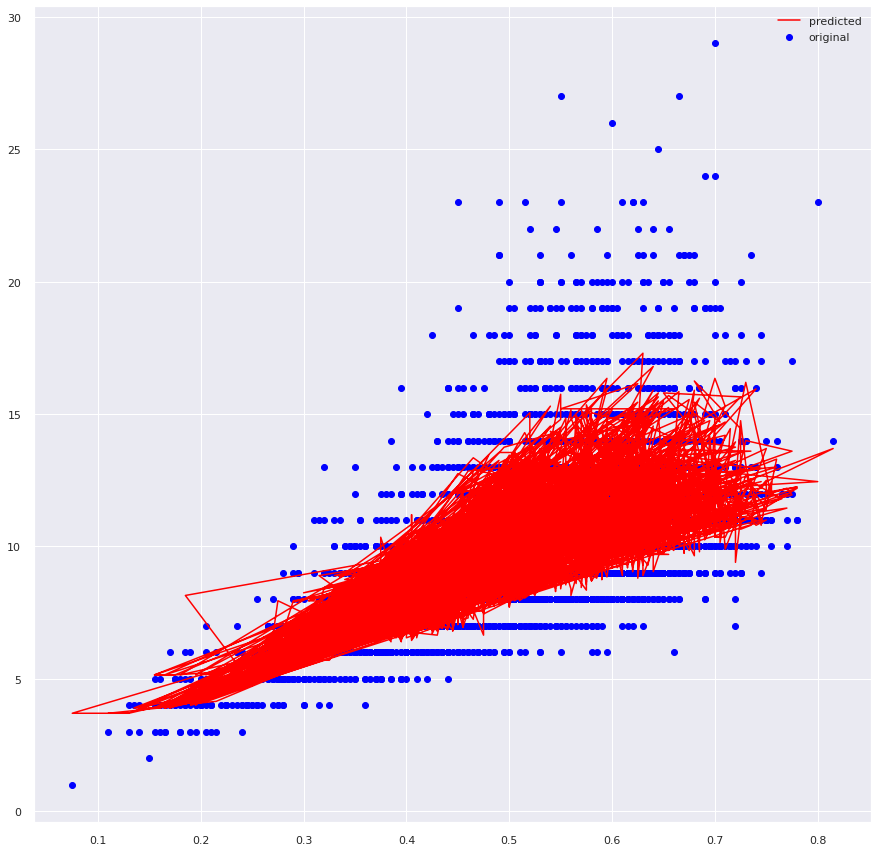

In [463]:
x_ax=range(200)
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(df['Length'], y_predX, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



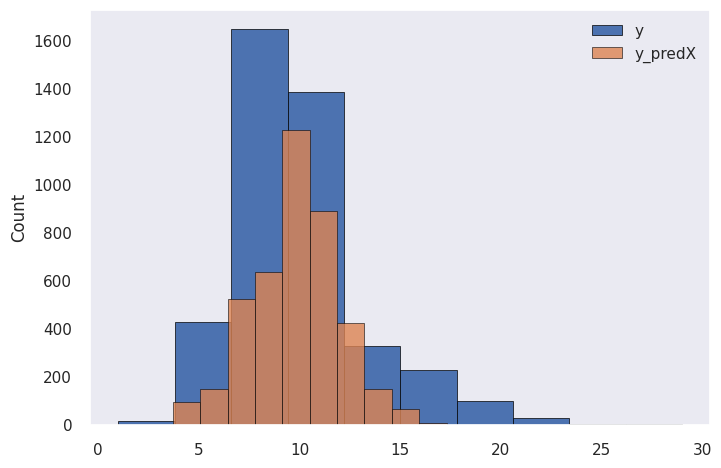

In [470]:
data_original = y
data_predict = y_predX

fig1 = plt.figure(dpi=100)
ax1  = fig1.add_subplot(1,1,1)
ax2  = fig1.add_subplot(1,1,1)

ax1.hist(data_original , edgecolor='black' ,linewidth = 0.5 , label='Ring Original' )
ax2.hist(data_predict , edgecolor='black', linewidth = 0.5 ,alpha = 0.8 ,  label='Ring Predic')

plt.legend(labels=['y', 'y_predX'])

plt.ylabel("Count")
#plt.xlabel("Percentage of Animal Owners")
#plt.style.use('classic')
plt.grid();
plt.show();

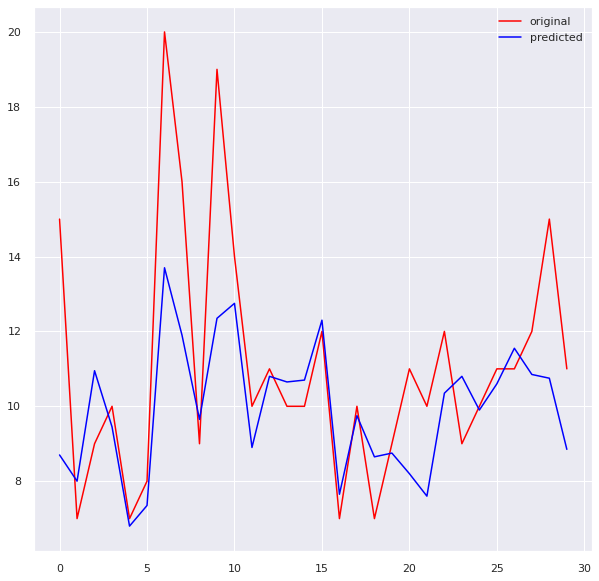

In [486]:

f, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(df['Length'], y, color="blue", label="original")
ax.plot(y[:30], lw=1.5, color="red", label="original")
ax.plot(y_predX[:30], lw=1.5, color="blue", label="predicted")
plt.legend()
plt.show()

# **Clasificar por Sexo**

In [492]:
# Sex Length	Diameter	Height	'Whole weight'	'Shucked weight'	'Viscera weight' 'Shell weight' Rings
# values los deja como arreglo , pero se pueden usar los dataframe Directos

# Forma 1 cuando son pocas columnas para el loc
#X = df_valores.loc[:, ['campo1','campo2','campo3','campo4']]    #.values

# Forma 2 cuando debo eliminar pocas columnas y deben quedar muchas columnas en el data frame
X = df_valores.drop(columns=['Sex']) #.values 

# Forma 3 Parecido a parte 1 , en el loc se podría usar un filtro. Ojo
#X = df_valores[['campo1','campo2','campo3','campo4']]  #.values

X.shape



(4177, 8)

In [491]:
y = df_valores['Sex']
y.shape

(4177,)

In [501]:
n_neighbors = 10
for n_neighbors in range(1,20,1):
  y_pred , y_predX , X_test , y_test  , score = MetodoKNNClasificador(X , y , n_neighbors)

n_neighbors = 1 
y_pred      = [1 2 0 ... 0 1 2] 
y_test      = 866     0
1483    0
599     1
1702    1
670     0
       ..
162     0
2206    1
3980    1
3075    1
2148    0
Name: Sex, Length: 1254, dtype: int64 
score       = 0.8479770169978453  

n_neighbors = 2 
y_pred      = [1 0 0 ... 0 1 2] 
y_test      = 866     0
1483    0
599     1
1702    1
670     0
       ..
162     0
2206    1
3980    1
3075    1
2148    0
Name: Sex, Length: 1254, dtype: int64 
score       = 0.6636341872157051  

n_neighbors = 3 
y_pred      = [1 0 0 ... 0 1 2] 
y_test      = 866     0
1483    0
599     1
1702    1
670     0
       ..
162     0
2206    1
3980    1
3075    1
2148    0
Name: Sex, Length: 1254, dtype: int64 
score       = 0.6736892506583673  

n_neighbors = 4 
y_pred      = [1 0 0 ... 0 0 2] 
y_test      = 866     0
1483    0
599     1
1702    1
670     0
       ..
162     0
2206    1
3980    1
3075    1
2148    0
Name: Sex, Length: 1254, dtype: int64 
score       = 0.6404117787886042  

n_ne

In [505]:
y_pred , y_predX , X_test , y_test  , score = MetodoKNNClasificador(X , y , 1)

n_neighbors = 1 
y_pred      = [1 2 0 ... 0 1 2] 
y_test      = 866     0
1483    0
599     1
1702    1
670     0
       ..
162     0
2206    1
3980    1
3075    1
2148    0
Name: Sex, Length: 1254, dtype: int64 
score       = 0.8479770169978453  



In [506]:
matrix = metrics.confusion_matrix(y_test.values, y_pred )
matrix

array([[199, 168,  91],
       [172, 150,  55],
       [ 92,  57, 270]])

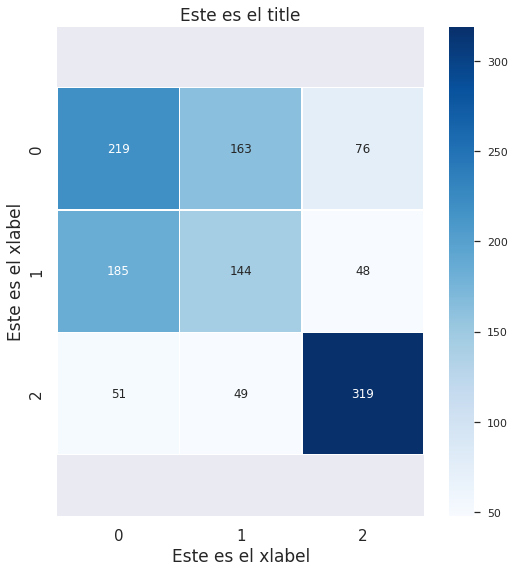

In [504]:
GraficoMatrizConfuncion(matrix, title='Este es el title', xlabel='Este es el xlabel', ylabel='Este es el xlabel' );

In [509]:
print(y.values)
print(y_predX)


[0 0 1 ... 0 1 0]
[2 0 1 ... 0 1 1]


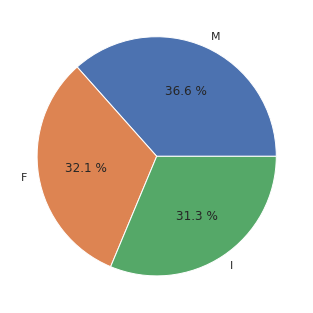

In [536]:
datos_y = y.value_counts()
nombres = ["M","F","I"]
plt.pie(datos_y, labels=nombres , autopct="%0.1f %%")
plt.show()

In [529]:
datos_y

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

In [537]:
datosx = pd.DataFrame(y_pred,columns=['Sex'])
datosx

Sex
0       1
1       2
2       0
3       0
4       1
...   ...
1249    1
1250    0
1251    0
1252    1
1253    2

[1254 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



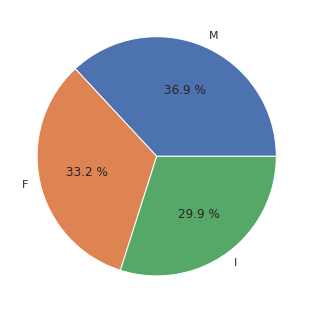

In [553]:
datos_yp = pd.DataFrame(datosx.value_counts(),columns=['Sex']) 
nombres = ["M","F","I"]
plt.pie(datos_yp, labels=nombres , autopct="%0.1f %%")
plt.show()

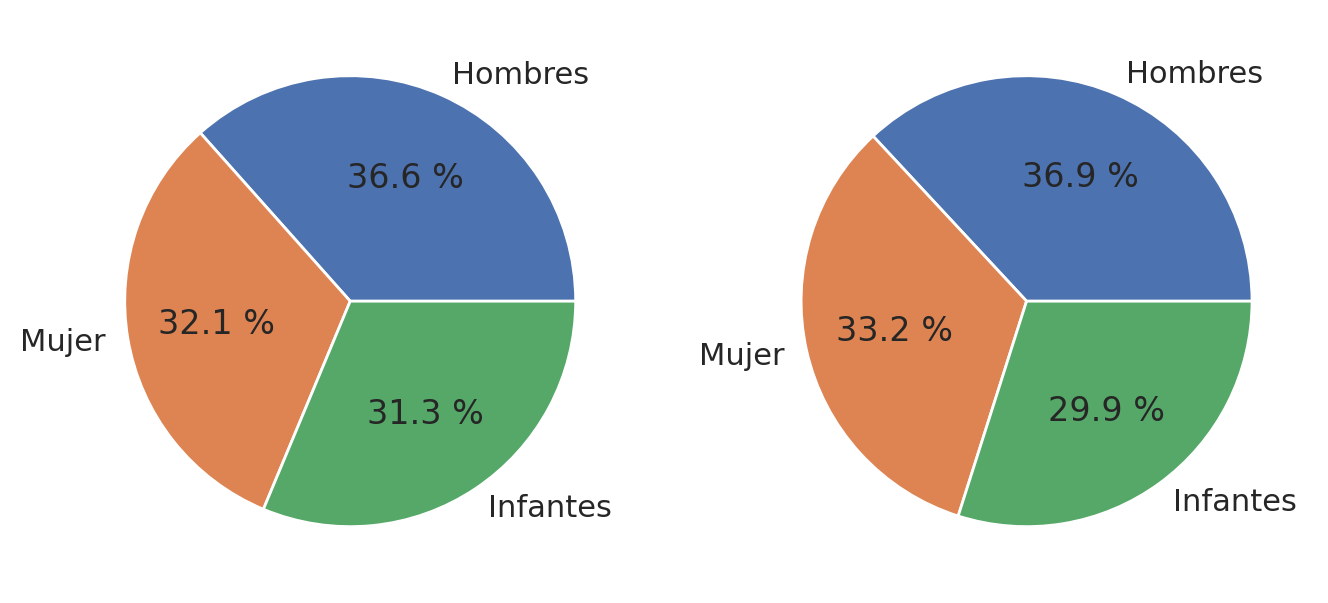

In [602]:
datos_yp = datosx.value_counts()
datos_y = y.value_counts()

nombres = ["Hombres","Mujer","Infantes"]
fig1 = plt.figure(dpi=200)
ax1 = fig1.add_subplot(1,2,1)
ax1.pie(datos_y, labels=nombres , autopct="%0.1f %%")

ax2 = fig1.add_subplot(1,2,2)
ax2.pie(datos_yp, labels=nombres , autopct="%0.1f %%")

plt.show()



Una vez que hayas completado las dos tareas, responde las siguientes preguntas.

¿Podrías haber utilizado la regresión lineal y la regresión KNN para resolver el problema de regresión?

**Si, incluso con regresión Lineal debería ser más efectivo**

¿Podrías haber utilizado la regresión lineal para el problema de clasificación?

**No, para este caso no sirve la regresión lineal.**